Training notebook

<h1>Libraries</h1>

In [1]:
import numpy as np
import tensorflow as tf
import cv2 as cv
import os
import configparser
import sklearn
from matplotlib import pyplot as plt
import time
import logging

<h1> Global Variables </h1>

In [2]:
PWD = os.path.abspath(os.getcwd())
CONFIG = configparser.RawConfigParser()
CONFIG.read('..\\..\\config\\.properties')
TEST_DIR = CONFIG.get('GeneralConfiguration', 'data.test');
TRAIN_DIR = CONFIG.get('GeneralConfiguration', 'data.train');
MODELS = CONFIG.get('GeneralConfiguration', 'models.dir');
IMG_INPUT_SHAPE = cv.imread(f'{TRAIN_DIR}\\happy\\im999.png').shape
SHAPE_DIR = (48, 48) # images are 48x48 format

<h1>Functions</h1>

<h2>Main</h2>

Preparing the dataset 

In [3]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255)    
train_dataset = train_generator.flow_from_directory(
    directory=TRAIN_DIR,
    #color_mode='grayscale',
    target_size = SHAPE_DIR,
    class_mode = "categorical",
    shuffle=True,
    seed=42,                                                                          # randomizer
    batch_size=32
)
class_indices = train_dataset.class_indices
print('class indices:', class_indices)

Found 28709 images belonging to 7 classes.
class indices: {'angry': 0, 'disgusted': 1, 'fearful': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprised': 6}


Building the model

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=32, activation='relu', input_shape=IMG_INPUT_SHAPE),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Flatten(),                        # Added a flatten layer to solve shape incompatibility
    tf.keras.layers.Dense(7, activation = "softmax")  # number of neurons in the final layer should be equal to the classes (7)
])

In [5]:
model.compile(loss = "categorical_crossentropy",      # for multiclass classification
              optimizer = 'sgd',                      # Stochastic Gradient Descent to make things simpler
              metrics=['accuracy']
)

Training

In [6]:
# NOTE: Make sure to log these!
tik = time.time()
history = model.fit(train_dataset,
                    epochs = 100
                    #batch_size = 32
                    
)
tok = time.time()
print(f'Training time: {int(tok-tik)} seconds')

Epoch 1/5
898/898 [==============================] - 35s 38ms/step - loss: 1.7725 - accuracy: 0.2749
Epoch 2/5
898/898 [==============================] - 34s 38ms/step - loss: 1.6777 - accuracy: 0.3427
Epoch 3/5
898/898 [==============================] - 34s 38ms/step - loss: 1.6435 - accuracy: 0.3579
Epoch 4/5
898/898 [==============================] - 34s 38ms/step - loss: 1.6197 - accuracy: 0.3715
Epoch 5/5
898/898 [==============================] - 34s 38ms/step - loss: 1.5995 - accuracy: 0.3822
Training time: 171 seconds


Model Utilities

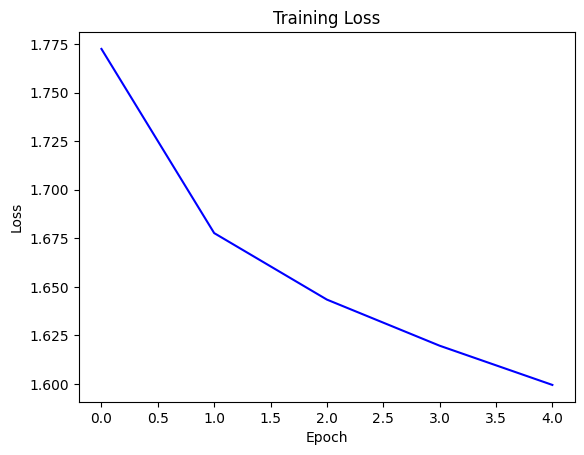

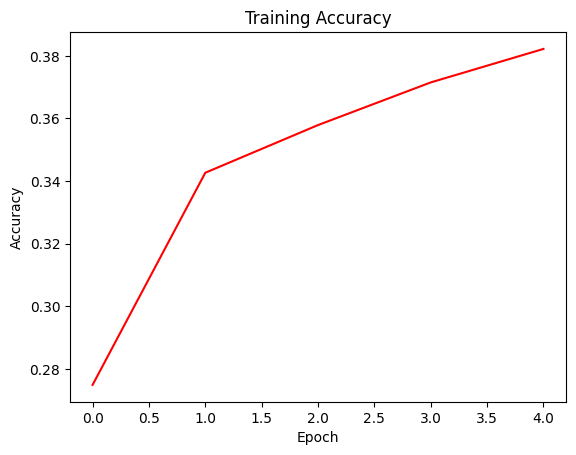

In [18]:
model.save(f'{MODELS}\\model1.h5')

hist_file = open(f'{MODELS}\\model_history.txt', 'a')
hist_file.write(f'{history.history}')
hist_file.close()
print(f'Model history saved in: {MODELS}\\model_history.txt')

plt.plot(history.history['loss'], color = 'blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.savefig(f'{MODELS}\\model1_loss.jpg')
plt.show()
print(f'Loss metrics figure saved in: {MODELS}\\model1_loss.jpg')
                
plt.plot(history.history['accuracy'], color = 'red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.savefig(f'{MODELS}\\model1_accuracy.jpg')
plt.show()
print(f'Accuracy metrics figure saved in: {MODELS}\\model1_accuracy.jpg')

[0.2749311923980713,
 0.3426800072193146,
 0.3579016923904419,
 0.37152111530303955,
 0.38221463561058044]

Playground